In [69]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import data

In [70]:
dir_main = os.getcwd()
dir_prepared_data = os.path.join(dir_main, "dataset", "prepared")
df = pd.read_csv(os.path.join(dir_prepared_data, "dataset.csv"),
                      sep=",",
                      header=0,
                      dtype={"date": object, "close": float, "open": float,
                             "high": float, "low": float,
                             "gdp": float, "effr": float,
                             "acwi_open": float})
df['date'] = pd.to_datetime(df['date'])
df.drop(['date','high','low'], axis=1, inplace=True)
df.reset_index()

,index,close,open,gdp,effr,acwi_open
0,0,-1.345435,-1.342970,-1.356437,-0.762869,-1.196648
1,1,-1.329387,-1.348735,-1.356437,-0.762869,-1.221651
2,2,-1.319719,-1.328121,-1.356437,-0.756076,-1.182173
3,3,-1.311241,-1.319250,-1.356437,-0.756076,-1.149933
4,4,-1.318699,-1.310099,-1.356437,-0.756076,-1.123615
...,...,...,...,...,...,...
2493,2493,1.559943,1.533400,2.088713,2.803442,1.271356
2494,2494,1.568512,1.567091,2.088713,2.803442,1.310175
2495,2495,1.582418,1.569266,2.088713,2.803442,1.285831
2496,2496,1.587353,1.589633,2.088713,2.803442,1.301622


## Generate model

In [71]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [72]:
train_data = df[:-30]
test_data = df[-30:]

X_train = train_data.drop('close', axis=1).to_numpy()
y_train = train_data['close'].to_numpy()
X_test = test_data.drop('close', axis=1).to_numpy()
y_test = test_data['close'].to_numpy()

In [74]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [75]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/50
78/78 [==============================] - 10s 11ms/step - loss: 0.2879
Epoch 2/50
78/78 [==============================] - 1s 12ms/step - loss: 0.0344
Epoch 3/50
78/78 [==============================] - 1s 11ms/step - loss: 0.0311
Epoch 4/50
78/78 [==============================] - 1s 13ms/step - loss: 0.0280
Epoch 5/50
78/78 [==============================] - 1s 12ms/step - loss: 0.0286
Epoch 6/50
78/78 [==============================] - 1s 12ms/step - loss: 0.0259
Epoch 7/50
78/78 [==============================] - 1s 13ms/step - loss: 0.0211
Epoch 8/50
78/78 [==============================] - 1s 11ms/step - loss: 0.0215
Epoch 9/50
78/78 [==============================] - 1s 13ms/step - loss: 0.0205
Epoch 10/50
78/78 [==============================] - 1s 12ms/step - loss: 0.0205
Epoch 11/50
78/78 [==============================] - 1s 11ms/step - loss: 0.0183
Epoch 12/50
78/78 [==============================] - 1s 13ms/step - loss: 0.0177
Epoch 13/50
78/78 [=================

## Predict model

In [76]:
y_hat = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


## Plot the result

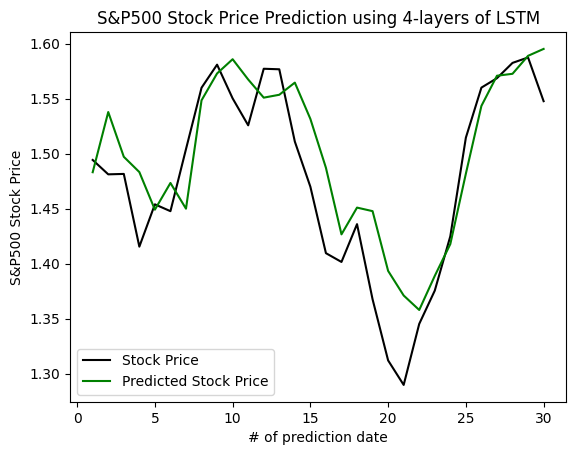

In [77]:
x_temp = np.arange(len(y_test)) + 1
plt.plot(x_temp, y_test, color = 'black', label = 'Stock Price')
plt.plot(x_temp, y_hat, color = 'green', label = 'Predicted Stock Price')
plt.title('S&P500 Stock Price Prediction using 4-layers of LSTM')
plt.xlabel('# of prediction date')
plt.ylabel('S&P500 Stock Price')
plt.legend()
plt.show()

## Save the prediction

In [78]:
dir = os.path.join(os.getcwd(), "dataset", "Prediction")
df = pd.DataFrame(y_hat, columns=["prediction"])
df.to_csv(os.path.join(dir, "LSTM.csv"), index=False)